# Importing the libraries
##ImageDataGenerator
ImageDataGenerator help in to generate more number of data. For e.g in medical field images of cancer is very costly so in that case we can increase the number of images by using the ImageDataGenerator
##Sequential
sequential means in simple word  moving one layers to other layers   

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten,BatchNormalization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/Datasets-20230122T094010Z-001.zip'

Archive:  /content/drive/MyDrive/Datasets-20230122T094010Z-001.zip
  inflating: Datasets/jones_gabriel.zip  
  inflating: Datasets/yalefaces.zip  
  inflating: Datasets/homer_bart_2.zip  
  inflating: Datasets/homer_bart_1.zip  
  inflating: Datasets/fer2013_2_classes.zip  
  inflating: Datasets/cat_dog_2.zip  
  inflating: Datasets/cat_dog_1.zip  
  inflating: Datasets/fer_images.zip  


In [ ]:
!unzip '/content/Datasets/fer_images.zip'

Streaming output truncated to the last 5000 lines.
 extracting: fer2013/train/Surprise/259.jpg  
 extracting: fer2013/train/Surprise/2590.jpg  
 extracting: fer2013/train/Surprise/2591.jpg  
 extracting: fer2013/train/Surprise/2592.jpg  
 extracting: fer2013/train/Surprise/2593.jpg  
 extracting: fer2013/train/Surprise/2594.jpg  
 extracting: fer2013/train/Surprise/2595.jpg  
 extracting: fer2013/train/Surprise/2596.jpg  
 extracting: fer2013/train/Surprise/2597.jpg  
 extracting: fer2013/train/Surprise/2598.jpg  
 extracting: fer2013/train/Surprise/2599.jpg  
 extracting: fer2013/train/Surprise/26.jpg  
 extracting: fer2013/train/Surprise/260.jpg  
 extracting: fer2013/train/Surprise/2600.jpg  
 extracting: fer2013/train/Surprise/2601.jpg  
 extracting: fer2013/train/Surprise/2602.jpg  
 extracting: fer2013/train/Surprise/2603.jpg  
 extracting: fer2013/train/Surprise/2604.jpg  
 extracting: fer2013/train/Surprise/2605.jpg  
 extracting: fer2013/train/Surprise/2606.jpg  
 extracting: 

##Train and Test

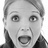

In [ ]:
image = cv2.imread('/content/fer2013/train/Fear/1002.jpg')
cv2_imshow(image)

In [ ]:
image.shape

(48, 48, 3)

#ImageDataGenerator
Here we apply the ImageDataGenerator on train dataset to increase the number of the Images paramer_uses = rescale means we are normalising the pixel because pixel ranges from 0 to 255, so just divide by 255 and now our image are became the in range (0-1).

rotation_range = 7 that means we rotate our images in clock and anticlockwise by 7 degree

horizontal_flip = 0.2 that means 20 percent of the data will flip horizontally

zoom_range = 0.2 that means 20 percent of the data will zoomin and zoom out

In [ ]:
train_generator = ImageDataGenerator(rescale=1./255,rotation_range= 7,horizontal_flip=0.2,zoom_range= 0.2)
train_dataset = train_generator.flow_from_directory('/content/fer2013/train',target_size = (48,48),batch_size = 15,class_mode = 'categorical',shuffle = True)

Found 28709 images belonging to 7 classes.


In [ ]:
train_dataset.classes

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [ ]:
np.unique(train_dataset.classes,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int32),
 array([3995,  436, 4097, 7215, 4965, 4830, 3171]))

In [ ]:
train_dataset.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

<Axes: ylabel='count'>

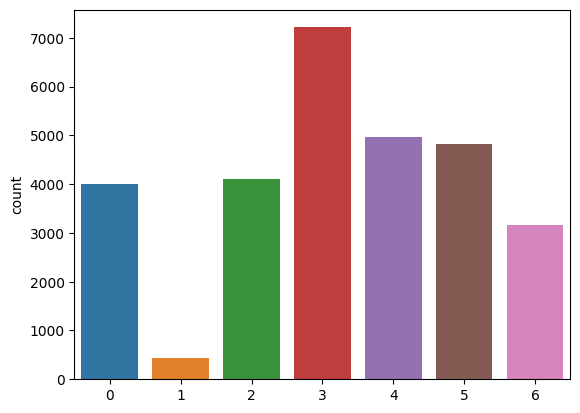

In [ ]:
sns.countplot(x = train_dataset.classes)

In [ ]:
test_generator = ImageDataGenerator(1./255)
test_dataset = test_generator.flow_from_directory('/content/fer2013/validation',target_size = (48,48),batch_size = 1,class_mode = 'categorical',shuffle = False)

Found 3589 images belonging to 7 classes.


##Building and training Convolution neural network

In [ ]:
2*2*2*32

256

#num_detector
num_detector means it will detect the different feature like one matrix will detect the nose and another one is the eye and so on.
#Conv2D
we use Conv2d beacause our images in the 2D formate
#Relu
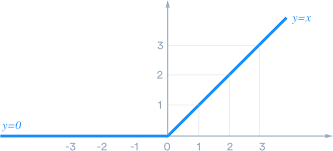
when y = x when x>0
             else 0

We use relu because it avoid the Vanishing Gradient problem e.g earlier we use the sigmoid function and sigmoid value always between 0 and 1 hence we multiply below the value of one it going toward zero hence our model is not going to update e.g 0.92*0.95*0.9*0.85 = 0.67 assume here we had taken only 4 value so its value is 0.67 so assume if our data have millions of calculation than it's going to almost zero then our weight is not going to update hence our model is not going to learn any thing.
#padding
padding means we just add the zero from all around the image matrix when we want to same dimension of output.
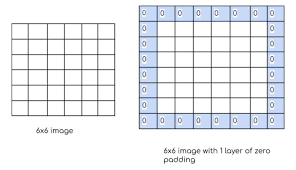

#BatchNormalization
Normalizing the data at every node it could either before or after the node fire.
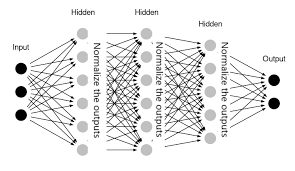
##Formula
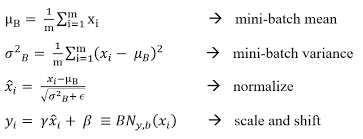

#Dropout
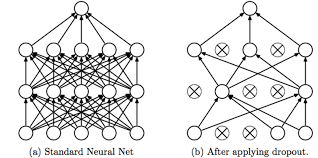

Dropout in simple we just drop the neuron for that instances and activate in the next instance.

#Flatten
It will convert my 2D data into the 1D data because ANN take 1D data only

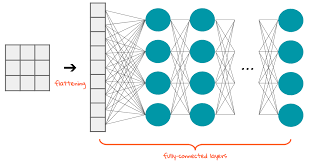

#Dense
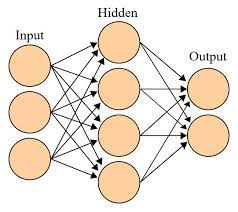

In [ ]:
num_detector = 32
num_classes = 7
width,height = 48,48
model = Sequential()
model.add(Conv2D(num_detector,(3,3),activation = 'relu',padding = 'same',input_shape = (width,height,3)))
model.add(BatchNormalization())
model.add(Conv2D(num_detector,(3,3),activation = 'relu',padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(2*num_detector,(3,3),activation = 'relu',padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(2*num_detector,(3,3),activation = 'relu',padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(2*2*num_detector,(3,3),activation = 'relu',padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*num_detector,(3,3),activation = 'relu',padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(2*2*2*num_detector,(3,3),activation = 'relu',padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*2*num_detector,(3,3),activation = 'relu',padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Flatten())


model.add(Dense(2 * num_detector, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(2 * num_detector, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 48, 48, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                        

#comile
compile means just setting up before the training out Neural Network
#Adam
Adam is optimizer so the question is what is optimizer, optimizer is help in to  update weight while in backpropogation and it most recent optimizer that converging faster than any other optimizer

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=40)

Epoch 1/40
1914/1914 [==============================] - 73s 29ms/step - loss: 1.8766 - accuracy: 0.2606
Epoch 2/40
1914/1914 [==============================] - 50s 26ms/step - loss: 1.5895 - accuracy: 0.3766
Epoch 3/40
1914/1914 [==============================] - 56s 29ms/step - loss: 1.4172 - accuracy: 0.4565
Epoch 4/40
1914/1914 [==============================] - 50s 26ms/step - loss: 1.3302 - accuracy: 0.4933
Epoch 5/40
1914/1914 [==============================] - 54s 28ms/step - loss: 1.2747 - accuracy: 0.5192
Epoch 6/40
1914/1914 [==============================] - 52s 27ms/step - loss: 1.2423 - accuracy: 0.5320
Epoch 7/40
1914/1914 [==============================] - 55s 29ms/step - loss: 1.1914 - accuracy: 0.5554
Epoch 8/40
1914/1914 [==============================] - 64s 34ms/step - loss: 1.1660 - accuracy: 0.5645
Epoch 9/40
1914/1914 [==============================] - 69s 36ms/step - loss: 1.1355 - accuracy: 0.5793
Epoch 10/40
1914/1914 [==============================] - 52s 27m

In [ ]:
model.evaluate(test_dataset)

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


3589/3589 [==============================] - 17s 5ms/step - loss: 176.5867 - accuracy: 0.1371


[176.5867156982422, 0.13708554208278656]

In [ ]:
predictions = model.predict(test_dataset)
predictions

3589/3589 [==============================] - 11s 3ms/step


array([[1.0000000e+00, 4.0953686e-34, 3.1102156e-17, ..., 5.8307740e-29,
        8.2759164e-23, 1.0930724e-31],
       [1.0000000e+00, 0.0000000e+00, 1.5565832e-23, ..., 0.0000000e+00,
        1.7460094e-34, 0.0000000e+00],
       [1.0000000e+00, 1.0257136e-34, 3.2149623e-16, ..., 1.4588548e-29,
        1.2843226e-25, 2.9253864e-35],
       ...,
       [1.0000000e+00, 5.2573081e-36, 2.2637776e-24, ..., 8.9473889e-35,
        6.7234214e-31, 5.2456891e-36],
       [1.0000000e+00, 3.3203199e-24, 2.3208794e-14, ..., 1.2295271e-17,
        1.9870076e-16, 7.6772166e-31],
       [1.0000000e+00, 1.2960782e-36, 8.5977551e-29, ..., 0.0000000e+00,
        2.3579221e-37, 0.0000000e+00]], dtype=float32)

In [ ]:
predictions = np.argmax(predictions, axis = 1)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
test_dataset.classes

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, predictions)

0.13708553914739482

In [ ]:
test_dataset.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_dataset.classes, predictions)
cm

array([[489,   0,   1,   0,   1,   0,   0],
       [ 55,   0,   0,   0,   0,   0,   0],
       [526,   0,   1,   0,   1,   0,   0],
       [878,   0,   0,   0,   0,   1,   0],
       [625,   0,   0,   0,   0,   0,   1],
       [593,   0,   0,   0,   0,   0,   1],
       [413,   0,   0,   0,   1,   0,   2]])

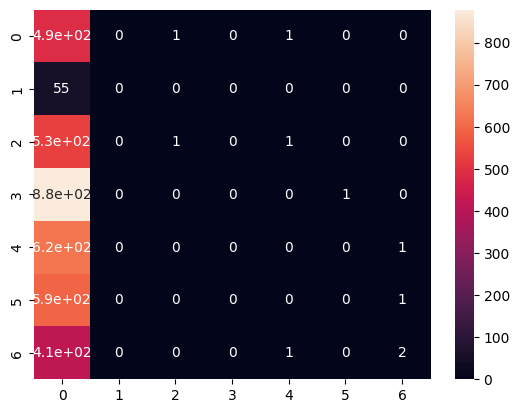

In [ ]:
sns.heatmap(cm, annot=True);

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       0.14      1.00      0.24       491
           1       0.00      0.00      0.00        55
           2       0.50      0.00      0.00       528
           3       0.00      0.00      0.00       879
           4       0.00      0.00      0.00       626
           5       0.00      0.00      0.00       594
           6       0.50      0.00      0.01       416

    accuracy                           0.14      3589
   macro avg       0.16      0.14      0.04      3589
weighted avg       0.15      0.14      0.03      3589



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


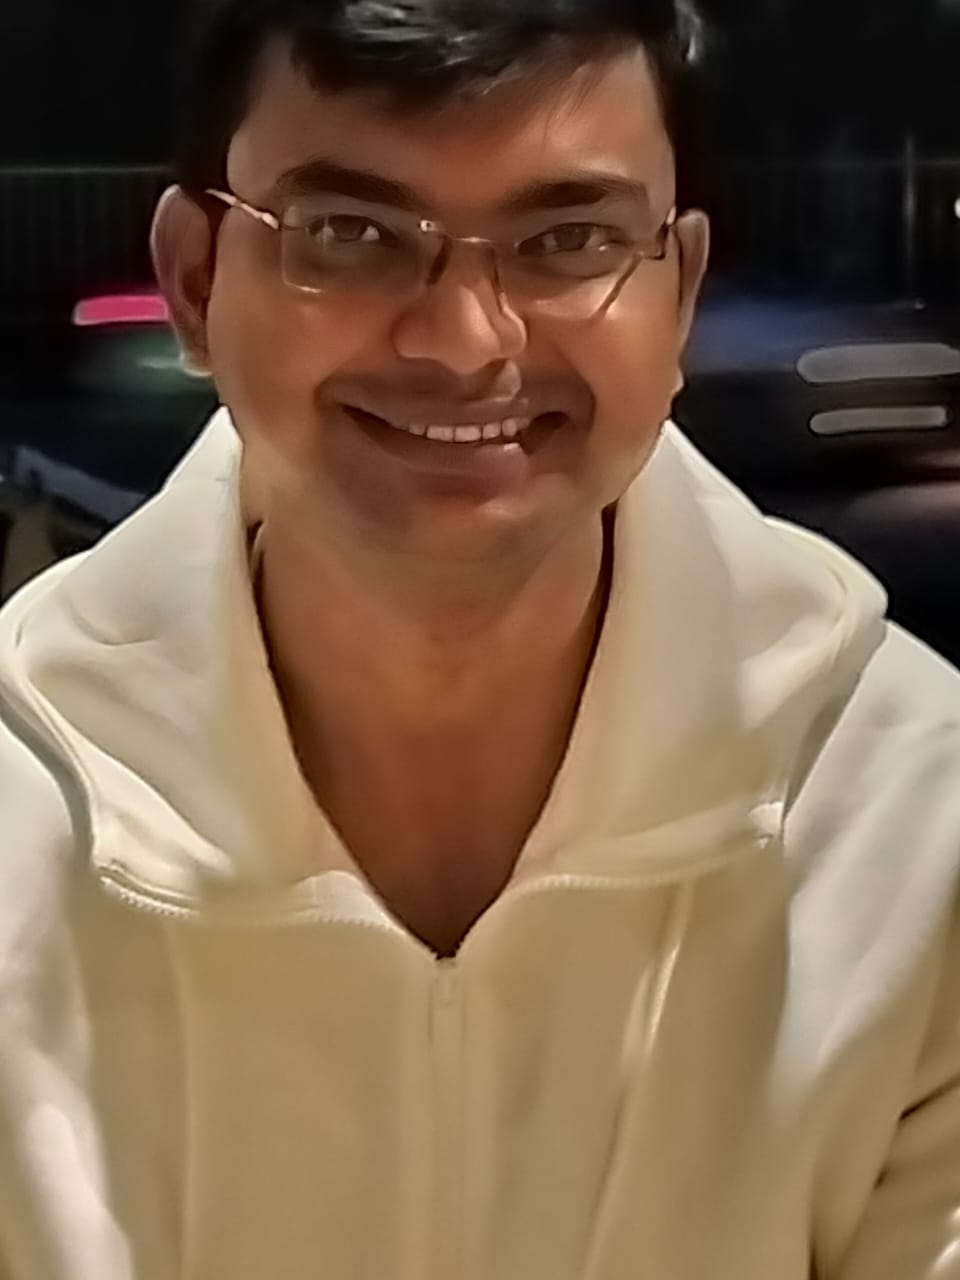

In [ ]:
image = cv2.imread('/content/WhatsApp Image 2023-10-03 at 15.26.08.jpeg')
cv2_imshow(image)

In [ ]:
image.shape

(1280, 960, 3)

In [ ]:
!unzip '/content/drive/MyDrive/Cascades-20230122T093946Z-001.zip'

Archive:  /content/drive/MyDrive/Cascades-20230122T093946Z-001.zip
  inflating: Cascades/haarcascade_eye.xml  
  inflating: Cascades/clocks.xml     
  inflating: Cascades/cars.xml       
  inflating: Cascades/fullbody.xml   
  inflating: Cascades/haarcascade_frontalface_default.xml  


In [ ]:
face_detector = cv2.CascadeClassifier('/content/Cascades/haarcascade_frontalface_default.xml')

In [ ]:
faces = face_detector.detectMultiScale(image)

In [ ]:
faces

array([[190,  42, 538, 538]], dtype=int32)

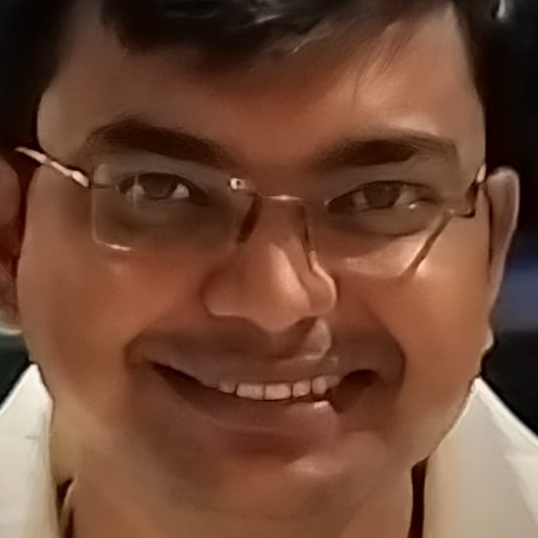

In [ ]:
region_of_interest = image[42:42 + 538, 190:190 + 538]
cv2_imshow(region_of_interest)

In [ ]:
region_of_interest.shape

(538, 538, 3)

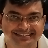

In [ ]:
region_of_interest = cv2.resize(region_of_interest, (48, 48))
cv2_imshow(region_of_interest)

In [ ]:
region_of_interest.shape

(48, 48, 3)

In [ ]:
region_of_interest

array([[[ 12,  14,  15],
        [  8,  10,  11],
        [  4,   5,   9],
        ...,
        [ 68,  70,  70],
        [ 19,  21,  21],
        [ 18,  18,  18]],

       [[  9,  11,  12],
        [  5,   7,   8],
        [  2,   3,   7],
        ...,
        [ 35,  37,  38],
        [ 16,  18,  18],
        [ 14,  14,  14]],

       [[  8,  10,  11],
        [  4,   6,   7],
        [  3,   4,   8],
        ...,
        [ 18,  20,  23],
        [ 13,  15,  16],
        [ 14,  14,  14]],

       ...,

       [[175, 191, 203],
        [179, 196, 208],
        [163, 182, 196],
        ...,
        [146, 164, 181],
        [143, 163, 180],
        [161, 180, 193]],

       [[174, 190, 202],
        [175, 191, 203],
        [149, 174, 188],
        ...,
        [143, 163, 180],
        [141, 161, 178],
        [138, 159, 174]],

       [[165, 181, 193],
        [167, 183, 195],
        [143, 170, 183],
        ...,
        [141, 161, 178],
        [140, 160, 177],
        [141, 162, 177]]

In [ ]:
region_of_interest = region_of_interest/255
region_of_interest

array([[[0.04705882, 0.05490196, 0.05882353],
        [0.03137255, 0.03921569, 0.04313725],
        [0.01568627, 0.01960784, 0.03529412],
        ...,
        [0.26666667, 0.2745098 , 0.2745098 ],
        [0.0745098 , 0.08235294, 0.08235294],
        [0.07058824, 0.07058824, 0.07058824]],

       [[0.03529412, 0.04313725, 0.04705882],
        [0.01960784, 0.02745098, 0.03137255],
        [0.00784314, 0.01176471, 0.02745098],
        ...,
        [0.1372549 , 0.14509804, 0.14901961],
        [0.0627451 , 0.07058824, 0.07058824],
        [0.05490196, 0.05490196, 0.05490196]],

       [[0.03137255, 0.03921569, 0.04313725],
        [0.01568627, 0.02352941, 0.02745098],
        [0.01176471, 0.01568627, 0.03137255],
        ...,
        [0.07058824, 0.07843137, 0.09019608],
        [0.05098039, 0.05882353, 0.0627451 ],
        [0.05490196, 0.05490196, 0.05490196]],

       ...,

       [[0.68627451, 0.74901961, 0.79607843],
        [0.70196078, 0.76862745, 0.81568627],
        [0.63921569, 0

In [ ]:
region_of_interest.shape

(48, 48, 3)

In [ ]:
region_of_interest = np.expand_dims(region_of_interest,axis = 0)

In [ ]:
region_of_interest.shape

(1, 48, 48, 3)

In [ ]:
probs = model.predict(region_of_interest)
probs

1/1 [==============================] - 0s 376ms/step


array([[4.0218355e-03, 4.3626977e-05, 1.9453901e-03, 8.5979527e-01,
        1.2994726e-01, 3.9160862e-03, 3.3058511e-04]], dtype=float32)

In [ ]:
result = np.argmax(probs)
result

3

In [ ]:
my_dict= test_dataset.class_indices
my_dict

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [ ]:
keys_with_value = []
for key,value in my_dict.items():
  if value ==result:
    print(key)

Happy
